<a href="https://colab.research.google.com/github/Tyriek-cloud/Individual-Projects/blob/main/DOHMH_Dog_Bite_EDA_%26_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DOHMH Dog Bite EDA & Logistic Regression Analysis**

Initially, this project was designed to conduct Exploratory Data Analysis (EDA) on data taken from the New York City Department of Health and Mental Hygiene's (DOHMH) Dog Bite dataset (https://data.cityofnewyork.us/Health/DOHMH-Dog-Bite-Data/rsgh-akpg). As the study progressed, it seemed beneficial to clean the data and explore relationships. Two questions emerged as the project was conducted. The first question was the following: What is the relationship between zipcodes and dogs who were spayed/neutered? The second question was the following: Does the age of the dogs (at the time in which the bites took place) have an influence on whether the dogs were spayed/neutered?

In [9]:
# First we import the pandas library to read the dataset (available online in json). We call head to see the first five lines.
import pandas as pd
path = "https://data.cityofnewyork.us/resource/rsgh-akpg.json"
df = pd.read_json(path)
df.head()

,uniqueid,dateofbite,species,breed,gender,spayneuter,borough,zipcode,age
0,1,2018-01-01T00:00:00.000,DOG,UNKNOWN,U,False,Brooklyn,11220.0,NaN
1,2,2018-01-04T00:00:00.000,DOG,UNKNOWN,U,False,Brooklyn,NaN,NaN
2,3,2018-01-06T00:00:00.000,DOG,Pit Bull,U,False,Brooklyn,11224.0,NaN
3,4,2018-01-08T00:00:00.000,DOG,Mixed/Other,M,False,Brooklyn,11231.0,4
4,5,2018-01-09T00:00:00.000,DOG,Pit Bull,U,False,Brooklyn,11224.0,NaN


In [10]:
# There are several values that are absent in the age column and elsewhere. For the purpose of this analysis, we shall drop these values.
df.dropna()

,uniqueid,dateofbite,species,breed,gender,spayneuter,borough,zipcode,age
3,4,2018-01-08T00:00:00.000,DOG,Mixed/Other,M,False,Brooklyn,11231.0,4
5,6,2018-01-03T00:00:00.000,DOG,BASENJI,M,False,Brooklyn,11231.0,4Y
8,9,2018-01-04T00:00:00.000,DOG,American Pit Bull Mix / Pit Bull Mix,M,False,Brooklyn,11235.0,5Y
9,10,2018-01-10T00:00:00.000,DOG,MIXED,F,False,Brooklyn,11208.0,3Y
11,12,2018-01-07T00:00:00.000,DOG,Yorkshire Terrier Crossbreed,M,True,Brooklyn,11208.0,7
...,...,...,...,...,...,...,...,...,...
988,989,2019-05-26T00:00:00.000,DOG,MALTESE/YORKSHIRE TERRIER,M,False,Brooklyn,11234.0,6M
992,993,2019-05-27T00:00:00.000,DOG,Pit Bull,F,False,Brooklyn,11234.0,3
994,995,2019-06-03T00:00:00.000,DOG,BORDER COLLIE X,F,True,Brooklyn,11217.0,1
995,996,2019-06-01T00:00:00.000,DOG,CORGI,M,True,Brooklyn,11209.0,5


In [11]:
# We will save the change in our data here.
df = df.dropna()

In [12]:
# Before moving forward, it seems helpful to get a better understanding of our data. Let's look at the data types, 
# see if there are any null (absent) counts in the columns, and see some descriptive statistics.
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 3 to 998
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uniqueid    423 non-null    int64  
 1   dateofbite  423 non-null    object 
 2   species     423 non-null    object 
 3   breed       423 non-null    object 
 4   gender      423 non-null    object 
 5   spayneuter  423 non-null    bool   
 6   borough     423 non-null    object 
 7   zipcode     423 non-null    float64
 8   age         423 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 30.2+ KB


,uniqueid,zipcode
count,423.000000,423.000000
mean,477.657210,11220.659574
std,297.561405,11.872244
min,4.000000,11201.000000
25%,194.000000,11209.000000
50%,482.000000,11220.000000
75%,747.500000,11231.000000
max,999.000000,11249.000000


In [13]:
# The above proved to be interesting. Let's take a look at some variables that might be neat for data analysis.
df[["dateofbite", "breed", "gender", "spayneuter", "borough", "age"]].describe()

,dateofbite,breed,gender,spayneuter,borough,age
count,423,423,423,423,423,423
unique,282,141,3,2,1,41
top,2018-04-04T00:00:00.000,MIXED BREED,M,False,Brooklyn,3
freq,5,30,302,226,423,65


It appears that the only borough reflected in the data is Brooklyn. There might be other problems in the data. It is important to observe if the data is actually clean or useful for analysis. Also, the data points are probably not very correlated with each other. Let's test that out below:

<ipython-input-14-242499e9bf1e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

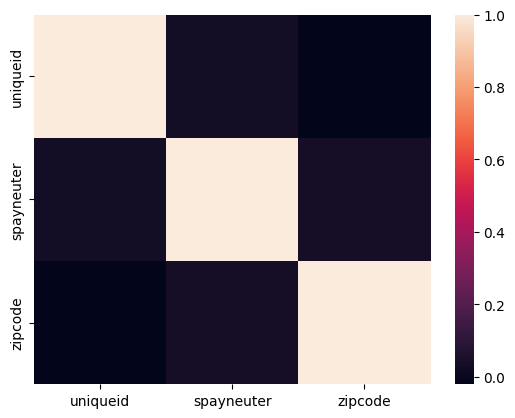

In [14]:
# We shall import seaborn to produce a visual for correlations in several variables. The above correlation suspicion is correct.
import seaborn as sns
sns.heatmap(df.corr())

Let's pull our data into Power Query. Because we are changing our data into .xlsx from .json, the data will at first look like a useless blob of information. We need to engage in a series of transformations.

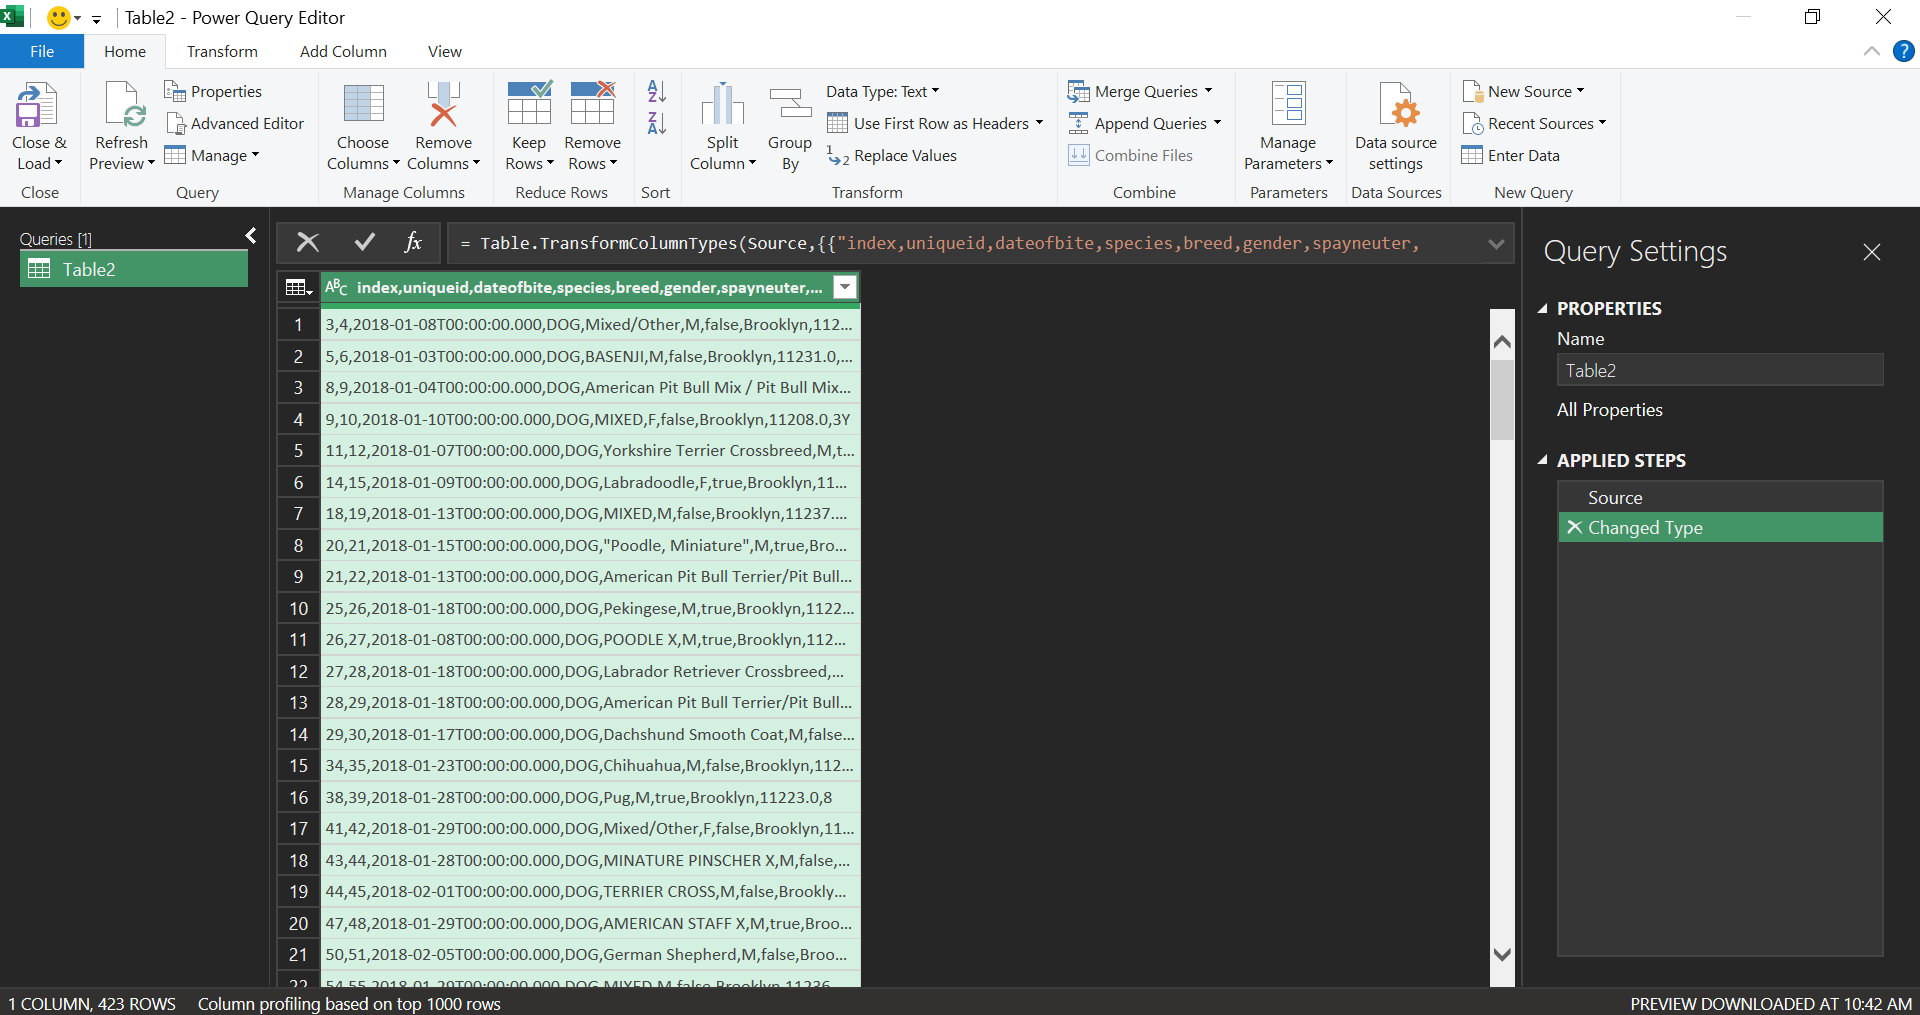

The process for cleaning the data is as follows: 


1. Load the data source into Power Query.
2. Split the columns by the comma delimiter.
3. Rename the columns to the appropriate values.
4. Remove the “species” column (there are only dogs in the table, afterall). We could also remove the borough column (this is optional).
5. Clean all the text and capitalize each word in the “breed” column.
6. Change “3 1/2” to “3.5” and “7-8 M” to “8” in agemonths.

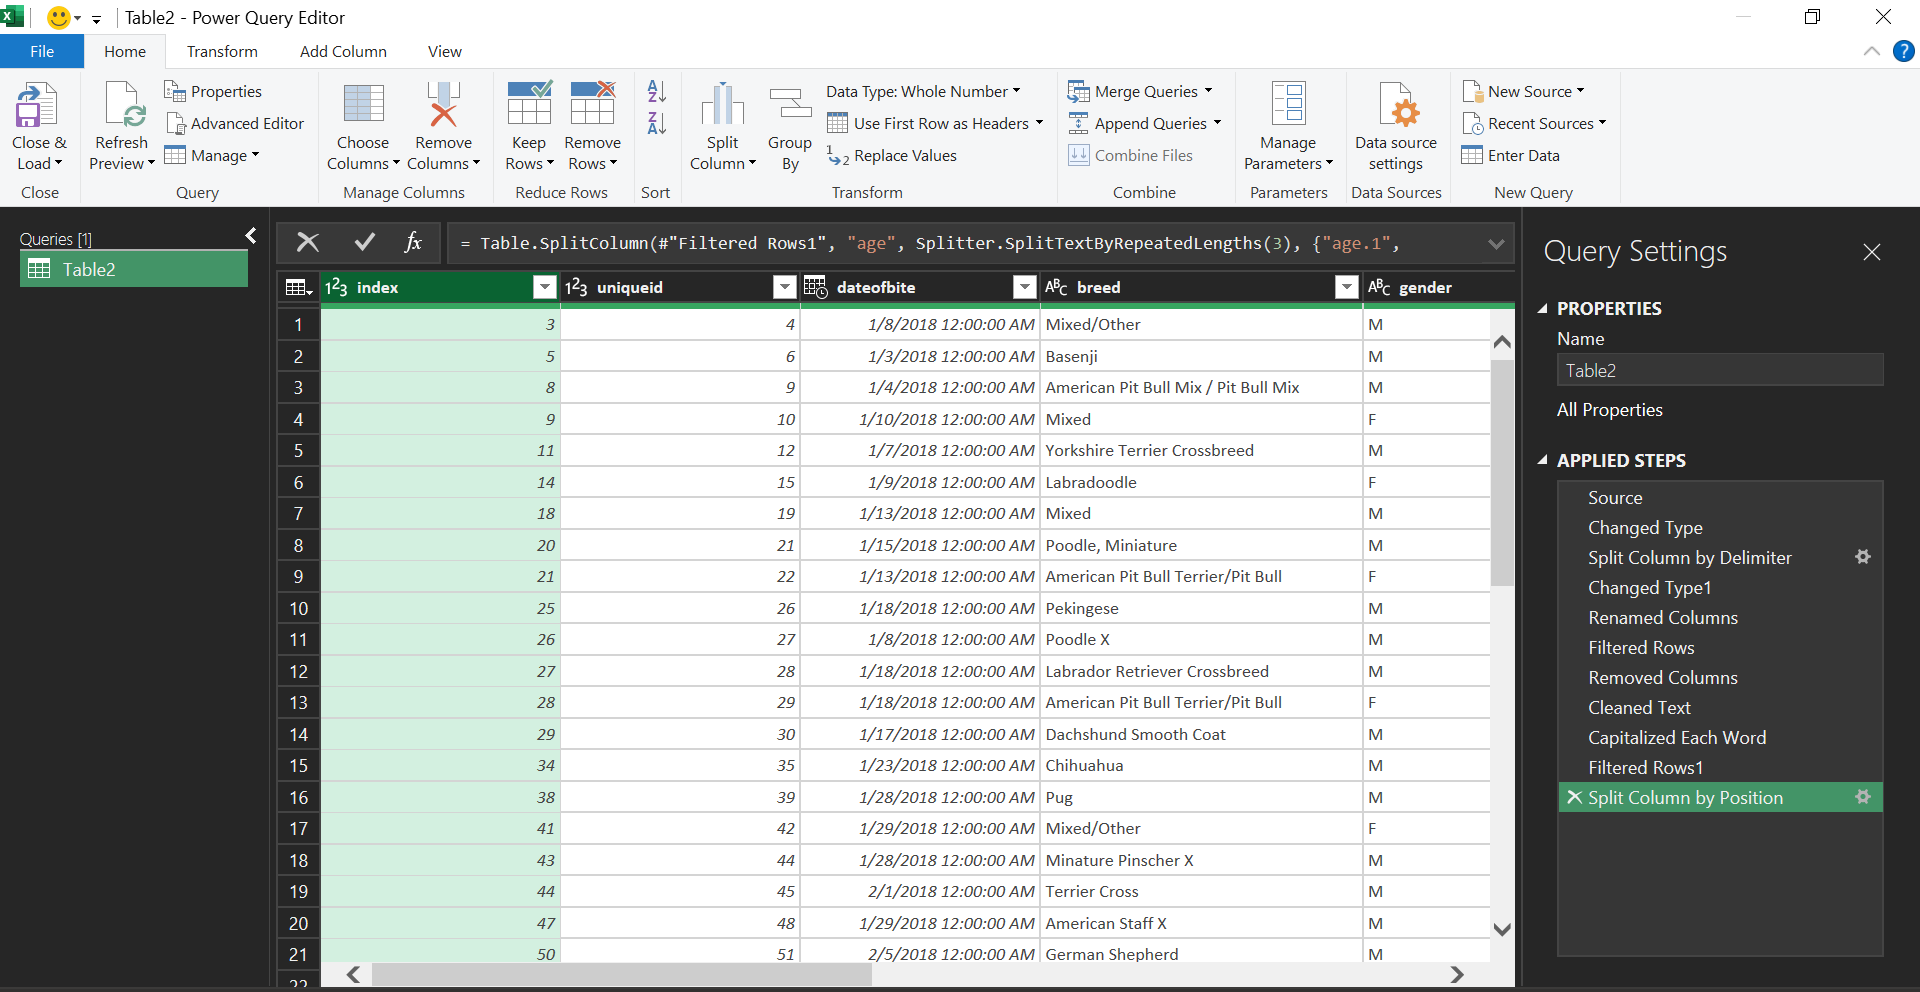

The final dataset will look like the table below. That is much better! However, the "NULL" values will affect our regression analysis later on in the project.

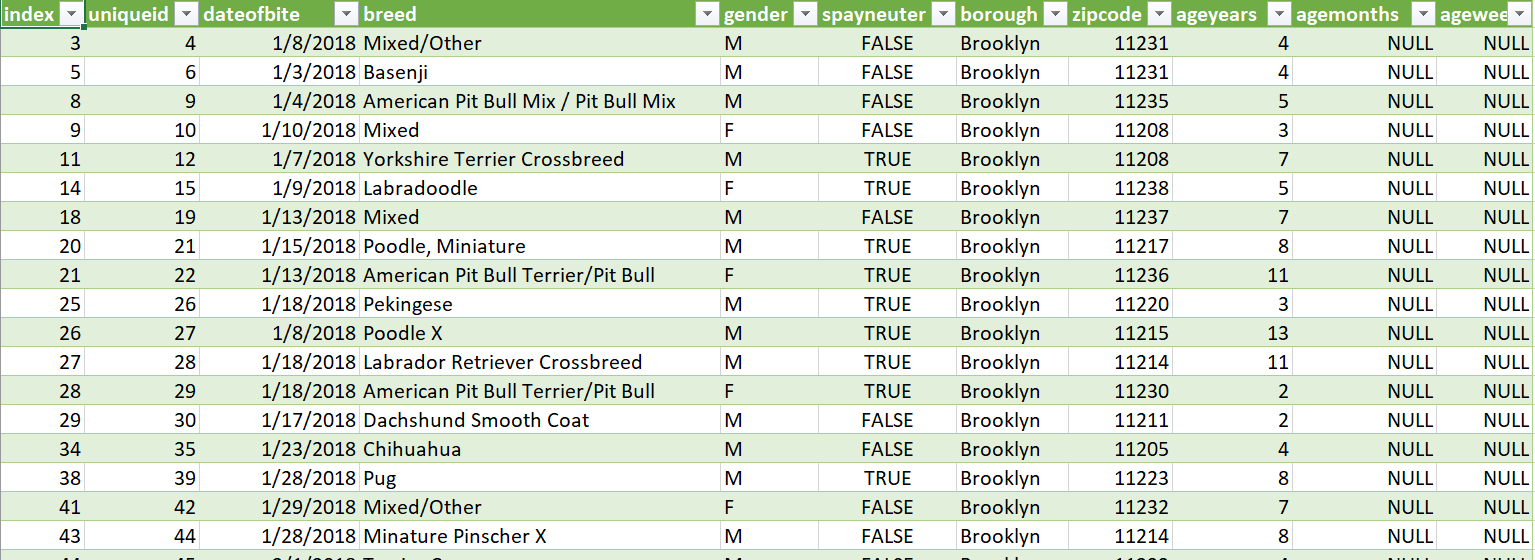

Let's answer the first question: What is the relationship between zipcodes and dogs were spayed/neutered? In the two charts below, we see some interesting descriptive statistics. In Brooklyn, New York Zipcode "11208", 35 dogs were not spayed/neutered. 11208 is also the Zipcode with the highest number of dog bites. However, 11209 also had high dog bite incidents. The majority of dog bite incidents in 11209 involved dogs who were spayed/neutered. The total difference for all dogs that were spayed/neutered in every borough is not much (197 who were spayed/neutered versus 226 who were not spayed/neutered). Certain zipcodes do have higher incidents of bites and higher numbers of dogs who were spayed/neutered. Often people assume that a dog being spayed/neutered can prevent dog bite incidents. However, the data does not seem to support the case that a dog being spayed/neutered prevents or causes the dog to bite people. There may be others variables that better explain why dogs bite people in the listed zipcodes of Brooklyn, New York. That said, any further analysis is outside the scope of EDA.

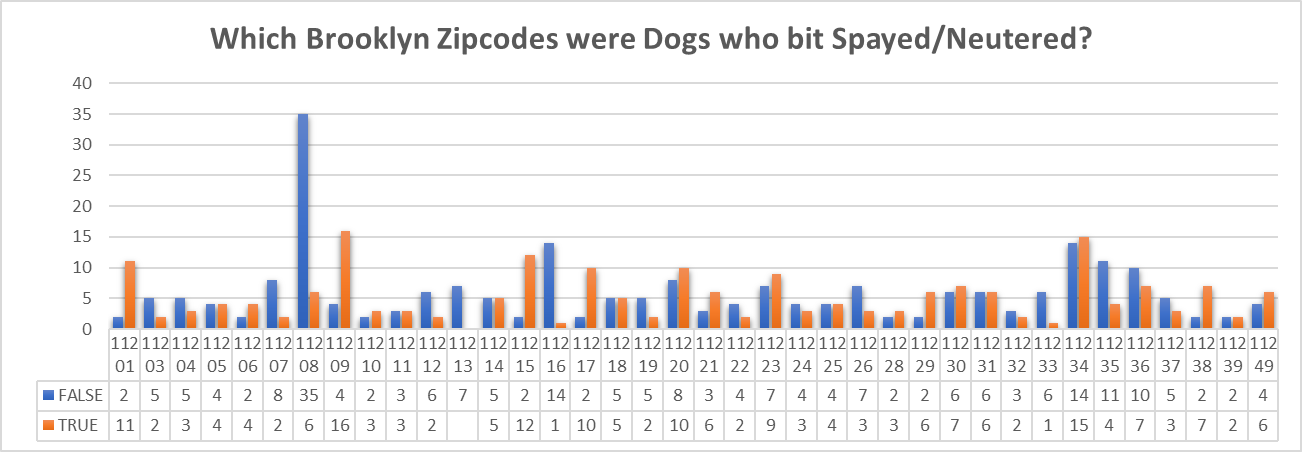

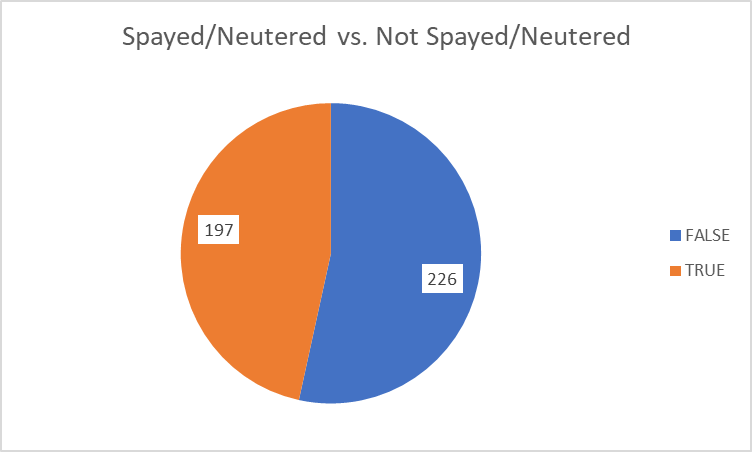

Next, we shall answer the second question of this project: Does the age of the dogs (at the time in which the bites took place) have an influence on whether the dogs were spayed/neutered?

In [15]:
# Importing the appropriate libraries to begin analyzing the clean dataset.
import pandas as pd
import numpy as np
import seaborn as sns

path = "/content/drive/MyDrive/Clean Dogs.xlsx" 
df = pd.read_excel(path)
df.head()

,index,uniqueid,dateofbite,breed,gender,spayneuter,borough,zipcode,ageyears,agemonths,ageweeks
0,3,4,2018-01-08,Mixed/Other,M,False,Brooklyn,11231,4.0,NaN,NaN
1,5,6,2018-01-03,Basenji,M,False,Brooklyn,11231,4.0,NaN,NaN
2,8,9,2018-01-04,American Pit Bull Mix / Pit Bull Mix,M,False,Brooklyn,11235,5.0,NaN,NaN
3,9,10,2018-01-10,Mixed,F,False,Brooklyn,11208,3.0,NaN,NaN
4,11,12,2018-01-07,Yorkshire Terrier Crossbreed,M,True,Brooklyn,11208,7.0,NaN,NaN


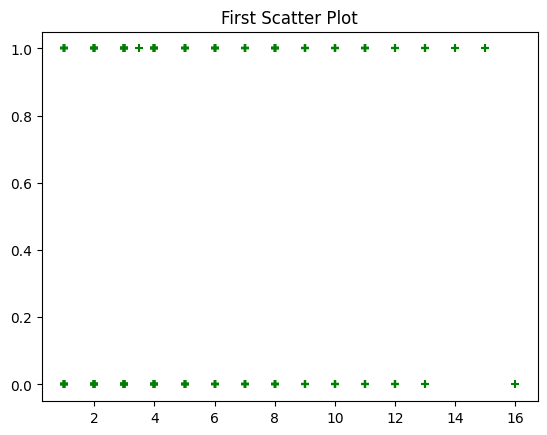

In [16]:
# Let's see how the data will look on a scatter plot (and also test if the data will load on said plot without issue).
# We will call pyplot from matplotlib to generate a "dummy" scatter plot.
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(df.ageyears, df.spayneuter, marker = "+", color = "green")
plt.title("First Scatter Plot")
plt.show()

In [17]:
# Let's now import train_test_split from scikit-learn to break our data into testing and training data.
from sklearn.model_selection import train_test_split
# We use the below to split our data into test and training data for a regression analysis.
X_train, X_test, y_train, y_test = train_test_split(df[["ageyears"]], df.spayneuter, test_size = 0.1)

In [18]:
# Let's see what is now listed in our testing data for the X (also the X axis on the final scatter plot) data.
X_test

,ageyears
395,3.0
61,6.0
36,2.0
117,15.0
257,3.0
352,12.0
93,1.0
172,2.0
399,5.0
354,8.0


There appears to be a minor problem. There are NaN (missing) values in our data. Normally this would present an issue when conducting a logistic regression in Python. Fortunately, scikit-learn has a gradient boosting classifier that will run NaN values for a defined model.

In [19]:
# Import HistGradientBoostingClassifier for Gradient Bossting.
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)
model.predict(X_test)

array([False,  True, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False,  True,  True, False, False, False, False])

In [20]:
# That is a lot of false values. Let's see our model score.
model.score(X_test, y_test)

0.5581395348837209

In [21]:
# Let's also look at our probability. 
model.predict_proba(X_test)

array([[0.54590785, 0.45409215],
       [0.40741071, 0.59258929],
       [0.59183513, 0.40816487],
       [0.54663205, 0.45336795],
       [0.54590785, 0.45409215],
       [0.45630435, 0.54369565],
       [0.5999987 , 0.4000013 ],
       [0.59183513, 0.40816487],
       [0.60605924, 0.39394076],
       [0.43709734, 0.56290266],
       [0.50543241, 0.49456759],
       [0.54590785, 0.45409215],
       [0.45362304, 0.54637696],
       [0.59183513, 0.40816487],
       [0.59183513, 0.40816487],
       [0.407128  , 0.592872  ],
       [0.50543241, 0.49456759],
       [0.59183513, 0.40816487],
       [0.54590785, 0.45409215],
       [0.54590785, 0.45409215],
       [0.40741071, 0.59258929],
       [0.5999987 , 0.4000013 ],
       [0.54590785, 0.45409215],
       [0.60605924, 0.39394076],
       [0.59183513, 0.40816487],
       [0.5999987 , 0.4000013 ],
       [0.59183513, 0.40816487],
       [0.54590785, 0.45409215],
       [0.50543241, 0.49456759],
       [0.60605924, 0.39394076],
       [0.

In [22]:
# We will also call in a confusion matrix for good measure.
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[19,  5],
       [14,  5]])

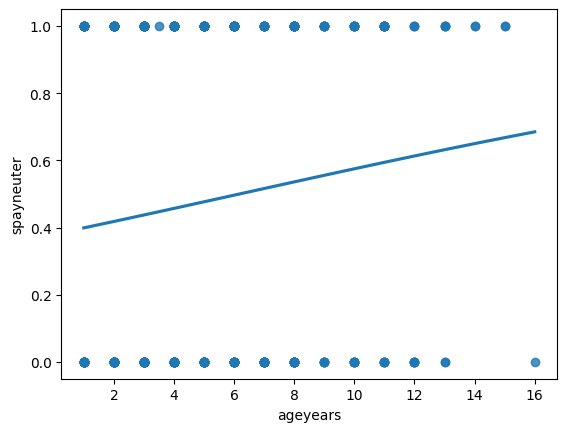

In [23]:
# Finally, we will generate another scatter plot.
import seaborn as sns

sns.regplot(x=df.ageyears, y=df.spayneuter, data=df, logistic=True, ci=None), 
scatter_kws = {"color": "blue"}, 
line_kws={"color": "orange"}

In [27]:
# Alright. Let's look at a report for the classification that occured in the model. 
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.58      0.79      0.67        24
        True       0.50      0.26      0.34        19

    accuracy                           0.56        43
   macro avg       0.54      0.53      0.51        43
weighted avg       0.54      0.56      0.52        43



We shall finally answer the second research question: Does the age of the dogs (at the time in which the bites took place) have an influence on whether the dogs were spayed/neutered? Simply put, not really or almost no significant influence. It appears that our model did a better job of predicting "False" values (for whether a dog was spayed/neutered) as opposed to "True" values. However, the precision values for both predictions are a little over 50% accurate (about 53% when looking at the ROC curve below). It is most likley the case that other factors have a stronger influence on whether a dog was spayed/neutered (such as if an owner regularly consulting veterinary assistance).  

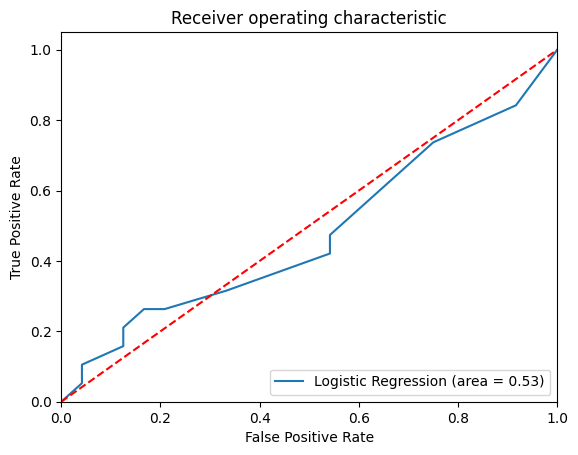

In [26]:
# This will generate the ROC curve (another tool to help understand predictive power of a classification).
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()